In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Exchange Rate Forecasting Project/Dataset/USD_AUD.csv")

In [5]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,02/28/2025,1.6103,1.6036,1.6149,1.6027,NaN,0.47%
1,02/27/2025,1.6028,1.5857,1.6048,1.5834,NaN,1.09%
2,02/26/2025,1.5855,1.5763,1.5885,1.5736,NaN,0.62%
3,02/25/2025,1.5758,1.5749,1.5820,1.5728,NaN,0.10%
4,02/24/2025,1.5743,1.5740,1.5764,1.5643,NaN,0.14%
...,...,...,...,...,...,...,...
3951,01/07/2010,1.0909,1.0871,1.0918,1.0790,NaN,0.39%
3952,01/06/2010,1.0867,1.0958,1.0991,1.0846,NaN,-0.89%
3953,01/05/2010,1.0965,1.0947,1.1003,1.0898,NaN,0.07%
3954,01/04/2010,1.0957,1.1127,1.1188,1.0942,NaN,-1.69%


In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)
df['Change %'] = df['Change %'].str.replace('%', '').astype(float)
df.drop(columns=['Vol.'], inplace=True)

In [7]:
df

,Date,Price,Open,High,Low,Change %
0,2010-01-01,1.1145,1.1142,1.1145,1.1142,0.01
1,2010-01-04,1.0957,1.1127,1.1188,1.0942,-1.69
2,2010-01-05,1.0965,1.0947,1.1003,1.0898,0.07
3,2010-01-06,1.0867,1.0958,1.0991,1.0846,-0.89
4,2010-01-07,1.0909,1.0871,1.0918,1.0790,0.39
...,...,...,...,...,...,...
3951,2025-02-24,1.5743,1.5740,1.5764,1.5643,0.14
3952,2025-02-25,1.5758,1.5749,1.5820,1.5728,0.10
3953,2025-02-26,1.5855,1.5763,1.5885,1.5736,0.62
3954,2025-02-27,1.6028,1.5857,1.6048,1.5834,1.09


In [8]:
features = ['Price', 'Open', 'High', 'Low', 'Change %']
df[features].describe()

,Price,Open,High,Low,Change %
count,3956.000000,3956.000000,3956.000000,3956.000000,3956.000000
mean,1.282125,1.282000,1.289018,1.275460,0.011502
std,0.194622,0.194728,0.195662,0.193623,0.666066
min,0.906900,0.906200,0.911100,0.902100,-3.590000
25%,1.094725,1.094700,1.101400,1.088975,-0.380000
50%,1.325200,1.325100,1.331650,1.319000,-0.010000
75%,1.431650,1.431825,1.440075,1.424025,0.390000
max,1.741300,1.741400,1.815900,1.710700,3.980000


In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3956 entries, 0 to 3955
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      3956 non-null   datetime64[ns]
 1   Price     3956 non-null   float64       
 2   Open      3956 non-null   float64       
 3   High      3956 non-null   float64       
 4   Low       3956 non-null   float64       
 5   Change %  3956 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 185.6 KB
None


In [10]:
print(df.isnull().sum())

Date        0
Price       0
Open        0
High        0
Low         0
Change %    0
dtype: int64


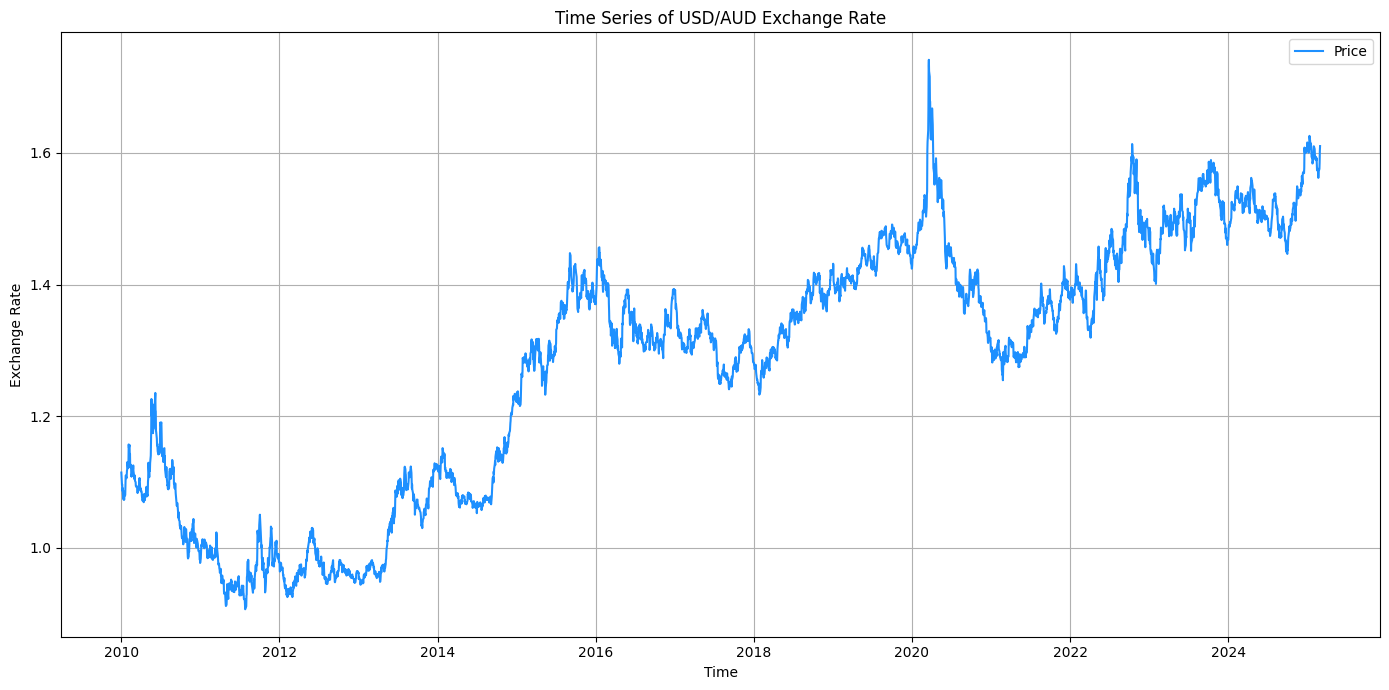

In [11]:
# Vẽ biểu đồ xu hướng giá theo thời gian
plt.figure(figsize=(14, 7))
plt.plot(df['Date'], df['Price'], label='Price', color='dodgerblue')
plt.title("Time Series of USD/AUD Exchange Rate")
plt.xlabel("Time")
plt.ylabel("Exchange Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
train_size = int(0.8 * len(df))
train_df = df.iloc[:train_size].copy()
test_df = df.iloc[train_size:].copy()

In [ ]:
print(f" Train size: {train_df.shape}")
print(f" Test size: {test_df.shape}")

 Train size: (3164, 6)
 Test size: (792, 6)


In [ ]:
train_df.to_csv("/content/drive/MyDrive/Exchange Rate Forecasting Project/Train-Test Split Dataset/USD_AUD/train_data_USD_AUD.csv", index=False)
test_df.to_csv("/content/drive/MyDrive/Exchange Rate Forecasting Project/Train-Test Split Dataset/USD_AUD/test_data_USD_AUD.csv", index=False)
